In [2]:
import pandas as pd



player_rankings = pd.read_csv("player_data.csv").values.tolist()
matches = pd.read_csv("match_data.csv").values.tolist()








In [3]:
temp = dict()

numbers = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
player_rankings = [x for x in player_rankings if x[-1][0] not in numbers]
player_names = [x[0] for x in player_rankings]

for x in player_rankings:
    temp[x[0]] = x[2:]


In [4]:
usefull_matches = []


for match in matches:
    if match[0] in player_names and match[1] in player_names:
        usefull_matches.append(match)
        







In [5]:
ultimate_data = usefull_matches.copy()

In [6]:
for match in ultimate_data:

    match[0] = temp[match[0]]
    match[1] = temp[match[1]]

ultimate_data

[[[552, 8.0, 'USA', 19, 'right', 'shakehand', 552, 'attack'],
  [734, 276.58, 'Nigeria', 31, 'right', 'shakehand', 734, 'attack'],
  '4:0',
  '1:0'],
 [[421, 3.07, 'USA', 45, 'left', 'shakehand', 421, 'attack'],
  [284, 253.51, 'Spain', 25, 'right', 'shakehand', 284, 'attack'],
  '0:4',
  '0:1'],
 [[571, 66.49, 'Republic', 30, 'right', 'shakehand', 571, 'attack'],
  [280, 75.78, 'Slovakia', 22, 'left', 'shakehand', 280, 'attack'],
  '2:4',
  '0:1'],
 [[314, 118.22, 'USA', 27, 'left', 'shakehand', 314, 'attack'],
  [735, 3.0, 'USA', 41, 'right', 'shakehand', 735, 'attack'],
  '4:0',
  '1:0'],
 [[329, 352.03, 'Kong', 24, 'right', 'shakehand', 329, 'attack'],
  [169, 67.92, 'France', 21, 'right', 'shakehand', 169, 'attack'],
  '3:4',
  '0:1'],
 [[130, 538.64, 'India', 22, 'right', 'shakehand', 130, 'attack'],
  [554, 12.25, 'Greece', 50, 'right', 'shakehand', 554, 'attack'],
  '4:0',
  '1:0'],
 [[874, 2.0, 'Venezuela', 46, 'right', 'shakehand', 874, 'attack'],
  [220, 247.17, 'Italy', 23,

In [7]:
df = pd.DataFrame(ultimate_data)

df

,0,1,2,3
0,"[552, 8.0, USA, 19, right, shakehand, 552, att...","[734, 276.58, Nigeria, 31, right, shakehand, 7...",4:0,1:0
1,"[421, 3.07, USA, 45, left, shakehand, 421, att...","[284, 253.51, Spain, 25, right, shakehand, 284...",0:4,0:1
2,"[571, 66.49, Republic, 30, right, shakehand, 5...","[280, 75.78, Slovakia, 22, left, shakehand, 28...",2:4,0:1
3,"[314, 118.22, USA, 27, left, shakehand, 314, a...","[735, 3.0, USA, 41, right, shakehand, 735, att...",4:0,1:0
4,"[329, 352.03, Kong, 24, right, shakehand, 329,...","[169, 67.92, France, 21, right, shakehand, 169...",3:4,0:1
...,...,...,...,...
3882,"[41, 1556.54, Austria, 43, right, shakehand, 4...","[218, 277.2, India, 33, left, shakehand, 218, ...",4:2,1:0
3883,"[41, 1556.54, Austria, 43, right, shakehand, 4...","[2, 4465.36, Japan, 19, right, shakehand, 2, a...",2:4,0:3
3884,"[9, 3521.32, Germany, 34, right, shakehand, 9,...","[2, 4465.36, Japan, 19, right, shakehand, 2, a...",4:0,5:5
3885,"[161, 433.29, Arabia, 25, left, shakehand, 161...","[341, 389.37, France, 33, right, shakehand, 34...",0:4,0:1


In [8]:
def winner(x):
    scores = x.split(":")
    try:
        if scores[0] > scores[1]:
            return 1
        else:
            return 0
    except:
        return 0

df["winner"] = df[3].apply(winner)
df = df.drop(axis=1, columns=[3])
df

,0,1,2,winner
0,"[552, 8.0, USA, 19, right, shakehand, 552, att...","[734, 276.58, Nigeria, 31, right, shakehand, 7...",4:0,1
1,"[421, 3.07, USA, 45, left, shakehand, 421, att...","[284, 253.51, Spain, 25, right, shakehand, 284...",0:4,0
2,"[571, 66.49, Republic, 30, right, shakehand, 5...","[280, 75.78, Slovakia, 22, left, shakehand, 28...",2:4,0
3,"[314, 118.22, USA, 27, left, shakehand, 314, a...","[735, 3.0, USA, 41, right, shakehand, 735, att...",4:0,1
4,"[329, 352.03, Kong, 24, right, shakehand, 329,...","[169, 67.92, France, 21, right, shakehand, 169...",3:4,0
...,...,...,...,...
3882,"[41, 1556.54, Austria, 43, right, shakehand, 4...","[218, 277.2, India, 33, left, shakehand, 218, ...",4:2,1
3883,"[41, 1556.54, Austria, 43, right, shakehand, 4...","[2, 4465.36, Japan, 19, right, shakehand, 2, a...",2:4,0
3884,"[9, 3521.32, Germany, 34, right, shakehand, 9,...","[2, 4465.36, Japan, 19, right, shakehand, 2, a...",4:0,0
3885,"[161, 433.29, Arabia, 25, left, shakehand, 161...","[341, 389.37, France, 33, right, shakehand, 34...",0:4,0


In [9]:
match_score = df[2]
df.drop(axis=1, columns=[2], inplace=True)

In [10]:
p1_df = df[0]
p2_df = df[1]

In [11]:
def ranking(x):
    return x[0]

def avg_point(x):
    return x[1]

def country(x):
    return x[2]

def age(x):
    return x[3]

def dominant_hand(x):
    return x[4]

def grip(x):
    return x[5]

def player_style(x):
    return x[7]


p1_data = pd.DataFrame()

p1_data["ranking"] = p1_df.apply(ranking)
p1_data["avg_point"] = p1_df.apply(avg_point)
p1_data["country"] = p1_df.apply(country)
p1_data["age"] = p1_df.apply(age)
p1_data["dominant_hand"] = p1_df.apply(dominant_hand)
p1_data["grip"] = p1_df.apply(grip)
p1_data["player_style"] = p1_df.apply(player_style)




In [12]:
p2_data = pd.DataFrame()

p2_data["ranking"] = p2_df.apply(ranking)
p2_data["avg_point"] = p2_df.apply(avg_point)
p2_data["country"] = p2_df.apply(country)
p2_data["age"] = p2_df.apply(age)
p2_data["dominant_hand"] = p2_df.apply(dominant_hand)
p2_data["grip"] = p2_df.apply(grip)
p2_data["player_style"] = p2_df.apply(player_style)


In [13]:
final_data = pd.concat([p1_data, p2_data],axis=1)
final_data["winner"] = df["winner"]


In [14]:
import seaborn as sns

In [15]:
final_data.corr()["winner"]


ranking     -0.178322
avg_point    0.148733
age          0.027672
ranking      0.269562
avg_point   -0.211800
age         -0.095081
winner       1.000000
Name: winner, dtype: float64

<AxesSubplot:>

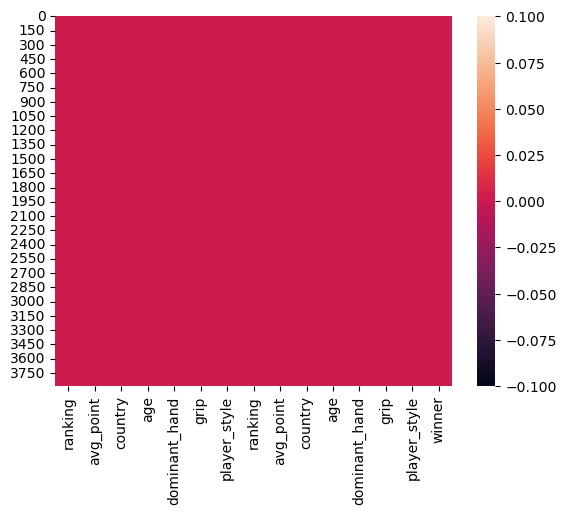

In [16]:
sns.heatmap(final_data.isnull())

In [17]:
final_data = pd.DataFrame()

In [18]:
p1_data = pd.get_dummies(data=p1_data, columns=["country", "dominant_hand", "player_style", "grip"])

In [19]:
p2_data = pd.get_dummies(data=p2_data, columns=["country", "dominant_hand", "player_style", "grip"])


In [20]:
final_data = pd.concat([p1_data, p2_data],axis=1)
final_data.dropna(axis=1, inplace=True)

In [21]:
results = df["winner"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(final_data, results, test_size=0.25)

In [24]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [25]:
clf_A = LogisticRegression()

In [26]:
clf_A.fit(X_train,y_train)

c:\Users\dirim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
predictions = clf_A.predict(X_test)

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       463
           1       0.72      0.80      0.76       509

    accuracy                           0.73       972
   macro avg       0.73      0.73      0.73       972
weighted avg       0.73      0.73      0.73       972



In [67]:
import pickle

In [68]:
pickle.dump(clf_A, open("match_predictor.pickle", "wb"))

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
final_data = scaler.fit_transform(final_data)


X_train, X_test, y_train, y_test = train_test_split(final_data, results, test_size=0.25)


In [64]:
model = Sequential()
model.add(Dense(200, input_dim=final_data.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
92/92 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4827
Epoch 2/10
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4803
Epoch 3/10
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4803
Epoch 4/10
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4803
Epoch 5/10
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4803
Epoch 6/10
92/92 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4803
Epoch 7/10
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4803
Epoch 8/10
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4803
Epoch 9/10
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4803
Epoch 10/10
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+0